In [37]:
import numpy as np
from matplotlib import pyplot as plt

In [140]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

options = webdriver.ChromeOptions()

options.add_argument('headless')
options.add_argument('window-size=600x310')

driver = webdriver.Chrome(options=options)

driver.get('file:///home/kocur4d/projects/dinotrainer/trex/index.html')

driver.implicitly_wait(10)

In [141]:
data = driver.execute_script('return document.getElementsByClassName("runner-canvas")[1].getContext("2d").getImageData(0,0,600,150);')['data']

In [143]:
a = np.array(data).reshape((90000, 4))
a = a[:, 2]
rhdata = a.reshape((150, 600))
rhdata = rhdata[60:, 45:450]
rhdata = np.where(rhdata > 0, 1, 0)
up = rhdata[:25]
down = rhdata[25:]
up_sum = np.sum(up,axis=0)
down_sum = np.sum(down,axis=0)
inputs = np.append(up_sum, down_sum)

In [144]:
inputs.shape

(810,)

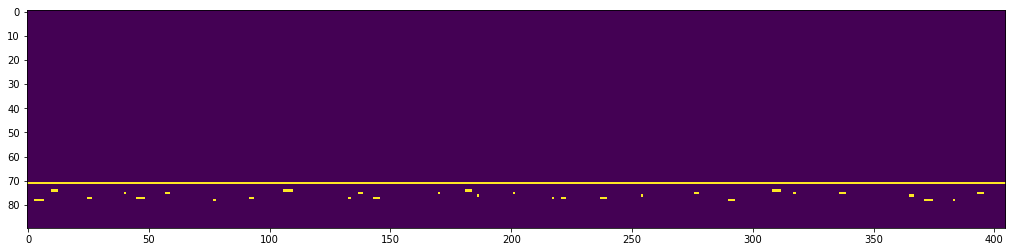

In [145]:
fig, ax = plt.subplots(figsize=(50, 4))
ax.imshow(rhdata, interpolation='nearest')

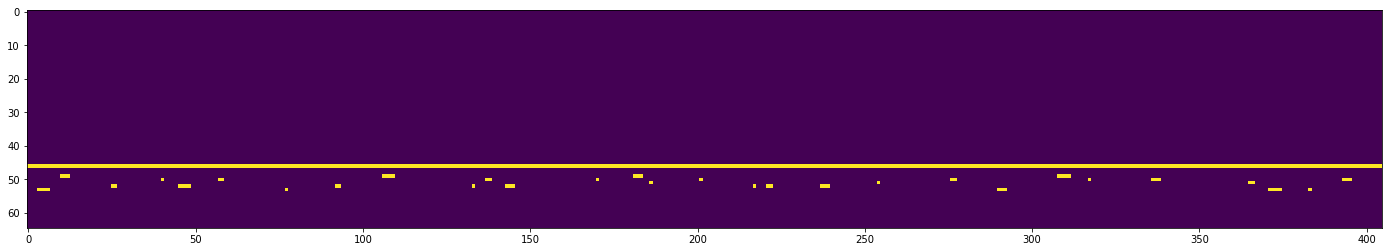

In [139]:
fig, ax = plt.subplots(figsize=(50, 4))
ax.imshow(down, interpolation='nearest')